# Consumo de Bateria Errado: Buscando Solução para o Problema


## Importação de Bibliotecas: Matplotlib e Z3


In [1]:
# Importa a biblioteca Matplotlib, que é usada para criar gráficos e visualizações em Python.
# O módulo 'pyplot' fornece uma interface semelhante à do MATLAB para manipulação de gráficos.
import matplotlib.pyplot as plt

# Importa todas as funções e classes da biblioteca Z3, um solucionador de problemas de Satisfiability Modulo Theories (SMT).
# O Z3 é frequentemente usado para resolver problemas matemáticos, lógicos e de otimização.
# O uso de 'from z3 import *' permite acessar diretamente as funções do Z3 sem precisar prefixá-las com 'z3.'
from z3 import *


## Configuração do Grid do Armazém e Posição Inicial do Drone


In [2]:
# Definição dos parâmetros que podem ser ajustados conforme necessário
num_rows = 4       # Número de "linhas" ou grupos de coordenadas no eixo X (quantidade de faixas verticais no armazém)
num_columns = 5    # Número de colunas de coordenadas no eixo Y (quantidade de faixas horizontais no armazém)
x_step = 2         # Distância entre as "linhas" no eixo X (espaçamento entre coordenadas X)
x_offset = 3       # Deslocamento inicial no eixo X (posição inicial da primeira linha)
y_offset = 1       # Deslocamento inicial no eixo Y (posição inicial da primeira coluna)

# Lista vazia para armazenar todas as coordenadas do armazém
warehouse = []

# Loop para gerar as coordenadas do armazém
for i in range(num_rows):  # Itera sobre o número de linhas (grupos de coordenadas no eixo X)
    # 'i' representa o índice da linha atual
    for j in range(num_columns):  # Itera sobre o número de colunas (grupos de coordenadas no eixo Y)
        # 'j' representa o índice da coluna atual

        x = x_step * i + x_offset  # Calcula a posição X aplicando o deslocamento e espaçamento entre linhas
        y = j + y_offset           # Calcula a posição Y aplicando apenas o deslocamento inicial

        warehouse.append((x, y))   # Adiciona a coordenada (x, y) à lista de posições do armazém

# Exibe todas as coordenadas geradas para representar o armazém
print("Coordenadas do armazém:", warehouse)

# Definição da posição inicial do drone (pode ser alterada conforme a necessidade)
drone = (0, 0)  # O drone começa na posição (0,0), que pode ser considerada a base ou ponto de partida
print("Posição inicial do drone:", drone)


Coordenadas do armazém: [(3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5)]
Posição inicial do drone: (0, 0)


## Visualização do Grid do Armazém e da Posição Inicial do Drone


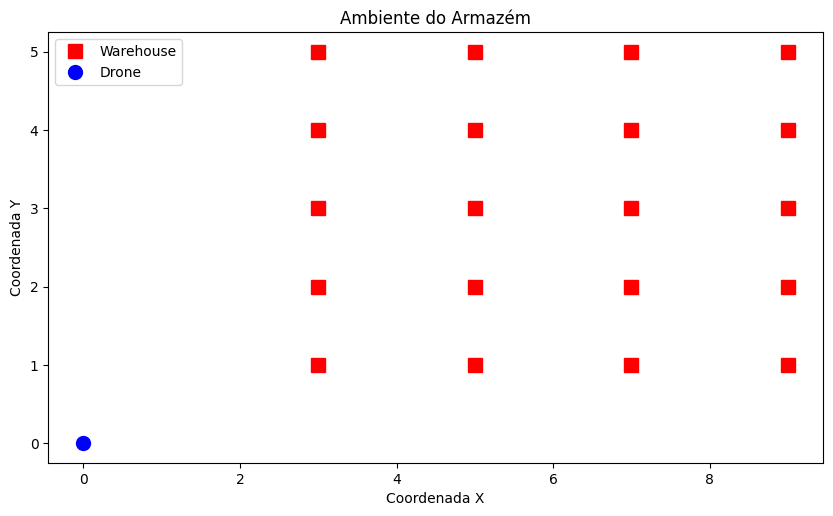

In [3]:
# Cria uma nova figura e um conjunto de eixos para a plotagem
fig, ax = plt.subplots(figsize=(10, 6))  
# 'fig' representa a figura geral onde o gráfico será desenhado
# 'ax' representa o sistema de coordenadas onde os elementos gráficos serão adicionados
# figsize=(10, 6) define o tamanho da figura em polegadas (10 de largura e 6 de altura)

# Plotagem dos pontos representando as coordenadas do armazém
ax.plot(
    [x for x, y in warehouse],  # Extrai todas as coordenadas X da lista warehouse
    [y for x, y in warehouse],  # Extrai todas as coordenadas Y da lista warehouse
    'rs',  # Define o marcador como um quadrado vermelho ('r' = red, 's' = square)
    markersize=10,  # Define o tamanho dos marcadores no gráfico
    label='Warehouse'  # Define o rótulo para a legenda do gráfico
)

# Plotagem da posição inicial do drone
ax.plot(
    drone[0],  # Coordenada X do drone
    drone[1],  # Coordenada Y do drone
    'bo',  # Define o marcador como um círculo azul ('b' = blue, 'o' = circle)
    markersize=10,  # Define o tamanho do marcador do drone
    label='Drone'  # Define o rótulo para a legenda do gráfico
)

# Adiciona um título ao gráfico
ax.set_title('Ambiente do Armazém')

# Define os rótulos dos eixos do gráfico
ax.set_xlabel('Coordenada X')  # Nome do eixo X
ax.set_ylabel('Coordenada Y')  # Nome do eixo Y

# Configura os eixos para ter a mesma escala, garantindo que as distâncias sejam proporcionais
ax.set_aspect('equal')

# Exibe a legenda no gráfico, utilizando os rótulos definidos nos plots
ax.legend()

# Mostra o gráfico na tela
plt.show()


# Otimização da Trajetória do Drone no Armazém com o Solver Z3

Solução encontrada com 32 timesteps mínimos:

Trajetória do Drone:
Passo 0: Posição (0, 0), Bateria 100
Passo 1: Posição (1, 0), Bateria 71
Passo 2: Posição (2, 1), Bateria 68
Passo 3: Posição (3, 1), Bateria 66
Passo 4: Posição (3, 2), Bateria 64
Passo 5: Posição (4, 3), Bateria 61
Passo 6: Posição (5, 4), Bateria 58
Passo 7: Posição (5, 3), Bateria 56
Passo 8: Posição (5, 2), Bateria 54
Passo 9: Posição (5, 1), Bateria 52
Passo 10: Posição (6, 1), Bateria 50
Passo 11: Posição (7, 1), Bateria 48
Passo 12: Posição (7, 2), Bateria 46
Passo 13: Posição (7, 3), Bateria 44
Passo 14: Posição (8, 2), Bateria 41
Passo 15: Posição (9, 1), Bateria 38
Passo 16: Posição (9, 2), Bateria 36
Passo 17: Posição (9, 3), Bateria 34
Passo 18: Posição (9, 4), Bateria 32
Passo 19: Posição (9, 5), Bateria 30
Passo 20: Posição (8, 4), Bateria 27
Passo 21: Posição (7, 4), Bateria 25
Passo 22: Posição (7, 5), Bateria 23
Passo 23: Posição (6, 4), Bateria 20
Passo 24: Posição (5, 5), Bateria 17
Passo 25: Posição

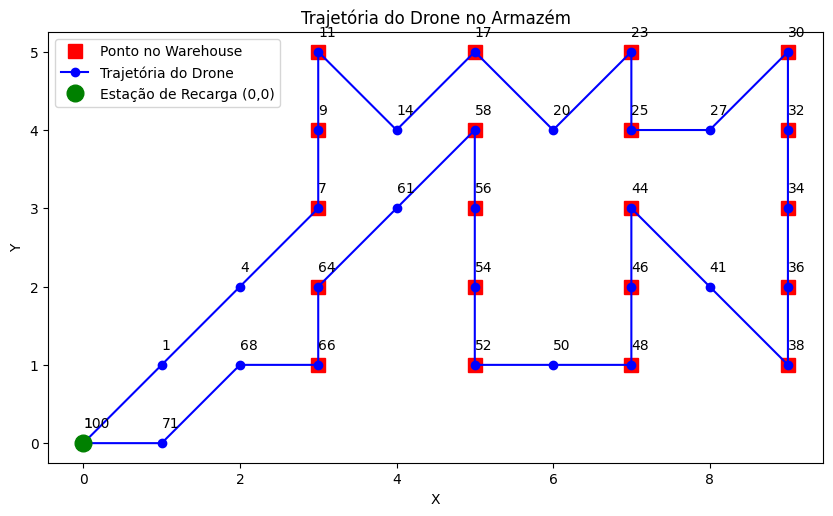

In [8]:
# Define a função que busca a solução com o menor número de timesteps, utilizando o Z3 Solver
def solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse):  # Define os parâmetros: máximo de timesteps, bateria máxima, limites da grade e pontos do warehouse
    # Itera sobre possíveis números de timesteps, começando de 1 até o máximo permitido
    for timesteps in range(1, max_timesteps + 1):  # Testa cada número de timesteps para encontrar a solução mínima
        s = Solver()  # Cria uma instância do Solver (do Z3) para resolver as restrições definidas

        # Declaração das variáveis para cada timestep
        PGx = [Int(f'pgx_{k}') for k in range(timesteps)]  # Cria uma lista de variáveis inteiras para a posição x do drone em cada timestep
        PGy = [Int(f'pgy_{k}') for k in range(timesteps)]  # Cria uma lista de variáveis inteiras para a posição y do drone em cada timestep
        Bat = [Int(f'bat_{k}') for k in range(timesteps)]  # Cria uma lista de variáveis inteiras para o nível de bateria do drone em cada timestep

        # Restrições de limites para as variáveis
        for b in Bat:  # Para cada variável de bateria na lista Bat
            s.add(And(b >= 1, b <= bmax))  # Adiciona a restrição de que o valor de bateria deve estar entre 1 e bmax (inclusivo)
        for x in PGx:  # Para cada variável de posição x na lista PGx
            s.add(And(x >= 0, x <= gridx))  # Adiciona a restrição de que a posição x deve estar entre 0 e gridx (inclusivo)
        for y in PGy:  # Para cada variável de posição y na lista PGy
            s.add(And(y >= 0, y <= gridy))  # Adiciona a restrição de que a posição y deve estar entre 0 e gridy (inclusivo)

        # Condições iniciais
        s.add(PGx[0] == 0)  # Define que a posição x inicial do drone é 0
        s.add(PGy[0] == 0)  # Define que a posição y inicial do drone é 0
        s.add(Bat[0] == bmax)  # Define que o nível de bateria inicial é igual à capacidade máxima bmax

        # Restrições de movimento e consumo de bateria
        for k in range(1, timesteps):  # Para cada timestep a partir do segundo (índice 1) até o último
            s.add(Or(PGx[k] == PGx[k-1] + 1, PGx[k] == PGx[k-1] - 1, PGx[k] == PGx[k-1]))  # Restringe o movimento em x para: avançar, recuar ou permanecer na mesma posição
            s.add(Or(PGy[k] == PGy[k-1] + 1, PGy[k] == PGy[k-1] - 1, PGy[k] == PGy[k-1]))  # Restringe o movimento em y para: subir, descer ou permanecer na mesma posição

            # A função 'Implies' em Z3 é uma implicação lógica: se a condição do primeiro argumento (premissa) for verdadeira, então o segundo argumento (conclusão) deve ser verdadeiro.
            s.add(Implies(  # Se o drone se move diagonalmente para cima à direita ou para baixo à esquerda, desconta 3 unidades de bateria
                Or(
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] + 1, PGx[k] != 0, PGy[k] != 0),  # Movimento diagonal para cima à direita, garantindo que não esteja na borda (valor 0)
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] - 1, PGx[k] != 0, PGy[k] != 0)   # Movimento diagonal para baixo à esquerda, garantindo que não esteja na borda
                ),
                Bat[k] == Bat[k-1] - 3  # Então, o consumo de bateria é de 3 unidades
            ))  # Finaliza a restrição condicional

            s.add(Implies(  # Se o drone se move diagonalmente para baixo à direita ou para cima à esquerda, desconta 3 unidades de bateria
                Or(
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1] - 1, PGx[k] != 0, PGy[k] != 0),  # Movimento diagonal para baixo à direita, com verificação de borda
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1] + 1, PGx[k] != 0, PGy[k] != 0)   # Movimento diagonal para cima à esquerda, com verificação de borda
                ),
                Bat[k] == Bat[k-1] - 3  # Então, o consumo de bateria é de 3 unidades
            ))  # Finaliza a restrição condicional

            s.add(Implies(  # Se o drone se move horizontalmente (para a direita ou para a esquerda) sem mudança em y, desconta 2 unidades de bateria
                Or(
                    And(PGx[k] == PGx[k-1] + 1, PGy[k] == PGy[k-1], PGx[k] != 0, PGy[k] != 0),  # Movimento para a direita, com verificação de borda
                    And(PGx[k] == PGx[k-1] - 1, PGy[k] == PGy[k-1], PGx[k] != 0, PGy[k] != 0)   # Movimento para a esquerda, com verificação de borda
                ),
                Bat[k] == Bat[k-1] - 2  # Então, o consumo de bateria é de 2 unidades
            ))  # Finaliza a restrição condicional

            s.add(Implies(  # Se o drone se move verticalmente (para cima ou para baixo) sem mudança em x, desconta 2 unidades de bateria
                Or(
                    And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] - 1),  # Movimento para baixo
                    And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1] + 1)   # Movimento para cima
                ),
                Bat[k] == Bat[k-1] - 2  # Então, o consumo de bateria é de 2 unidades
            ))  # Finaliza a restrição condicional

            s.add(Implies(  # Se o drone não se move (permanecendo na mesma posição) e não está na borda, não há consumo de bateria
                And(PGx[k] == PGx[k-1], PGy[k] == PGy[k-1], PGx[k] != 0, PGy[k] != 0),  # Verifica que não houve movimento, com condição de não estar na borda
                Bat[k] == Bat[k-1]  # Então, o nível de bateria permanece inalterado
            ))  # Finaliza a restrição condicional

        # Cada ponto no warehouse deve ser visitado em algum timestep
        for (x, y) in warehouse:  # Itera sobre cada coordenada (x, y) definida no warehouse
            s.add(Or([And(PGx[k] == x, PGy[k] == y) for k in range(timesteps)]))  # Garante que para cada ponto do warehouse, existe ao menos um timestep em que o drone está nessa posição

        # Adicionando restrição para que, no último timestep, o drone retorne ao ponto inicial (0,0)
        s.add(PGx[timesteps - 1] == 0)  # Define que a posição x do drone no último timestep deve ser 0 (retorno ao ponto inicial)
        s.add(PGy[timesteps - 1] == 0)  # Define que a posição y do drone no último timestep deve ser 0 (retorno ao ponto inicial)

        # Verifica se as restrições são satisfatíveis para o número atual de timesteps
        if s.check() == sat:  # Se o solver encontrar uma solução que satisfaça todas as restrições
            m = s.model()  # Armazena o modelo (solução) encontrado
            print("Solução encontrada com", timesteps, "timesteps mínimos:")  # Imprime a quantidade mínima de timesteps necessária para a solução
            return m, timesteps, PGx, PGy, Bat  # Retorna o modelo, número de timesteps e as listas de variáveis de posição e bateria

    print("Nenhuma solução encontrada até", max_timesteps, "timesteps.")  # Caso não seja encontrada solução em nenhum dos timesteps testados, exibe uma mensagem informativa
    return None, None, None, None, None  # Retorna None para cada variável, indicando a ausência de solução

# Parâmetros do problema
max_timesteps = 100  # Define o limite superior para a busca de timesteps (máximo 100 passos)
bmax = 100  # Define a capacidade máxima da bateria do drone
gridx = 9  # Define o tamanho máximo da grade no eixo x
gridy = 10  # Define o tamanho máximo da grade no eixo y

# Resolver o problema e obter o modelo e o número de timesteps mínimo
model, timesteps, PGx, PGy, Bat = solve_with_min_timesteps(max_timesteps, bmax, gridx, gridy, warehouse)  # Chama a função de resolução com os parâmetros definidos e o conjunto de pontos do warehouse

if model:  # Se um modelo (solução) foi encontrado
    # Extraindo os valores do modelo
    pgx_values = [model.evaluate(PGx[k]).as_long() for k in range(timesteps)]  # Cria uma lista com os valores inteiros das posições x do drone em cada timestep, avaliados a partir do modelo
    pgy_values = [model.evaluate(PGy[k]).as_long() for k in range(timesteps)]  # Cria uma lista com os valores inteiros das posições y do drone em cada timestep, avaliados a partir do modelo
    bat_values = [model.evaluate(Bat[k]).as_long() for k in range(timesteps)]  # Cria uma lista com os valores inteiros do nível de bateria em cada timestep, avaliados a partir do modelo

    # Exibindo os resultados
    print("\nTrajetória do Drone:")  # Imprime o cabeçalho para a exibição da trajetória do drone
    for t in range(timesteps):  # Para cada timestep, itera para exibir os dados
        print(f"Passo {t}: Posição ({pgx_values[t]}, {pgy_values[t]}), Bateria {bat_values[t]}")  # Exibe a posição (x,y) e o nível de bateria do drone no timestep atual

    # Visualização da trajetória
    fig, ax = plt.subplots(figsize=(10, 6))  # Cria uma figura e um eixo para plotar o gráfico com dimensões 10x6

    # Plotando os pontos do warehouse
    for i, (x, y) in enumerate(warehouse):  # Itera sobre os pontos do warehouse com seus índices
        if i == 0:  # Se for o primeiro ponto do warehouse
            ax.plot(x, y, 'rs', markersize=10, label="Ponto no Warehouse")  # Plota o ponto com um marcador vermelho quadrado e adiciona um label
        else:  # Para os demais pontos do warehouse
            ax.plot(x, y, 'rs', markersize=10)  # Plota o ponto com um marcador vermelho quadrado sem label

    # Plotando a trajetória do drone
    ax.plot(pgx_values, pgy_values, 'b-o', label="Trajetória do Drone")  # Plota a trajetória do drone conectando os pontos com linha azul e marcadores em círculo, com label
    ax.plot(0, 0, 'go', markersize=12, label="Estação de Recarga (0,0)")  # Plota o ponto inicial (estação de recarga) com marcador verde e adiciona um label

    # Adicionando a quantidade de bateria ao lado de cada ponto da trajetória
    for i in range(timesteps):  # Para cada timestep, itera para anotar o nível de bateria
        ax.text(pgx_values[i], pgy_values[i] + 0.2, f'{bat_values[i]}', fontsize=10)  # Adiciona um texto próximo ao ponto, exibindo o valor da bateria

    plt.xlabel("X")  # Define o rótulo do eixo x do gráfico
    plt.ylabel("Y")  # Define o rótulo do eixo y do gráfico
    plt.title("Trajetória do Drone no Armazém")  # Define o título do gráfico
    plt.legend()  # Exibe a legenda do gráfico para identificar os marcadores e linhas
    ax.set_aspect('equal')  # Define a proporção dos eixos para que a escala seja a mesma em x e y
    plt.show()  # Exibe o gráfico com a trajetória do drone
